<a href="https://colab.research.google.com/github/Shiyon-N/Internship/blob/master/Titanic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('titanic_train.csv')
df
#complete database

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [4]:
df.shape
#Total no of rows and coloumns

(850, 15)

In [0]:
df.drop('passenger_id',axis=1,inplace=True)

In [0]:
df.drop('fare',axis=1,inplace=True)
df.drop('name',axis=1,inplace=True)
df.drop('cabin',axis=1,inplace=True)
df.drop('ticket',axis=1,inplace=True)
#Dropped some irrelevant coloumns

In [7]:
df.head()

,pclass,sex,age,sibsp,parch,embarked,boat,body,home.dest,survived
0,3,female,NaN,0,0,Q,13,NaN,NaN,1
1,3,male,38.0,0,0,S,NaN,NaN,Croatia,0
2,3,female,30.0,1,1,S,NaN,NaN,NaN,0
3,2,female,54.0,1,3,S,4,NaN,"Cornwall / Akron, OH",1
4,2,male,40.0,0,0,S,NaN,NaN,"Barre, Co Washington, VT",0


In [8]:
s_variable=np.unique(df['survived'])
s_variable
#Either not survived(0) or survived(1)

array([0, 1])

In [9]:
s_variable,unique_counts=np.unique(df['survived'],return_counts=True)
print(f'The number of survived people are {unique_counts[1]}')
print(f'The number of not survived people are {unique_counts[0]}')
print(s_variable)
print(unique_counts)

The number of survived people are 313
The number of not survived people are 537
[0 1]
[537 313]


In [10]:
df['survived'].mean()
 #average of people survived

0.36823529411764705

In [12]:
passenger_gender=df.groupby('sex').mean()
passenger_gender
#the average data wrt sex.This shows tthat female had more siblings,paid more fare and had more chances of survival

,pclass,age,sibsp,parch,body,survived
sex,,,,,,
female,2.147157,28.858401,0.709030,0.585284,184.200000,0.702341
male,2.413793,29.898256,0.421053,0.272232,164.470588,0.186933


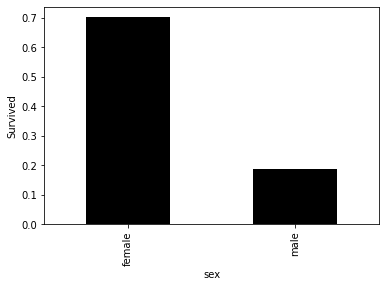

In [13]:
passenger_gender['survived'].plot.bar(color='k')
plt.ylabel('Survived')
plt.show()
#This shows that more females have survived than male.This may be either because they are more in number or because they got the priority while rescuing.

In [14]:
class_group=df.groupby('pclass').mean()
class_group
#the average results wrt pclass.This shows that pclass contained aged people and they had more chances of survival

,age,sibsp,parch,body,survived
pclass,,,,,
1,39.110960,0.422330,0.412621,172.916667,0.606796
2,28.601496,0.415663,0.331325,180.800000,0.457831
3,24.693949,0.602510,0.387029,154.205882,0.234310


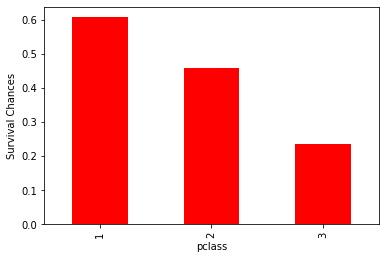

In [15]:
class_group['survived'].plot.bar(color='r')
plt.ylabel('Survival Chances')
plt.show()
#people in passenger class 1 were more survived

In [16]:
class_passenger=df.groupby(['pclass','sex']).mean()
class_passenger
#The data average wrt pclass and sex.This shows that more aged group were females in class 1,they paid more fare and they had high chances of survival

age     sibsp     parch        body  survived
pclass sex                                                        
1      female  38.134831  0.563830  0.531915         NaN  0.946809
       male    40.025439  0.303571  0.312500  172.916667  0.321429
2      female  26.976562  0.507463  0.507463         NaN  0.895522
       male    29.731884  0.353535  0.212121  180.800000  0.161616
3      female  21.275986  0.905797  0.659420  184.200000  0.442029
       male    26.002058  0.479412  0.276471  149.034483  0.150000

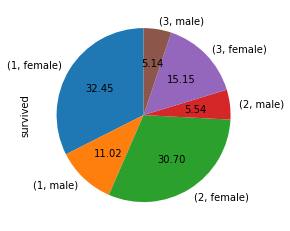

In [17]:
class_passenger['survived'].plot.pie(autopct='%1.2f',startangle=90)

plt.show()
#this shows female in class 1 were more survived

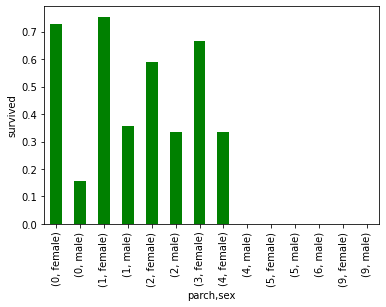

In [18]:
parch_estimate=df.groupby(['parch','sex']).mean()
parch_estimate['survived'].plot.bar(color='g')
plt.ylabel('survived')
plt.show()
#but when we also group using sex, the females who were in parch 1 has more chance of survival.

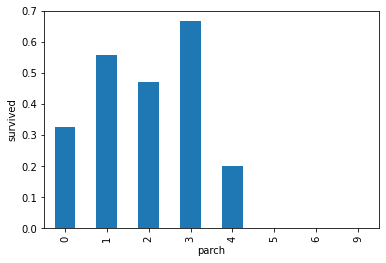

In [19]:
parch_estimate=df.groupby(['parch']).mean()
parch_estimate['survived'].plot.bar()
plt.ylabel('survived')
plt.show()
#people who are in parch 3 had more chance to get survived